In [136]:
True

True

In [137]:
import numpy as np

## Вариант 15

# Учимся брать интегралы методом Симпсона

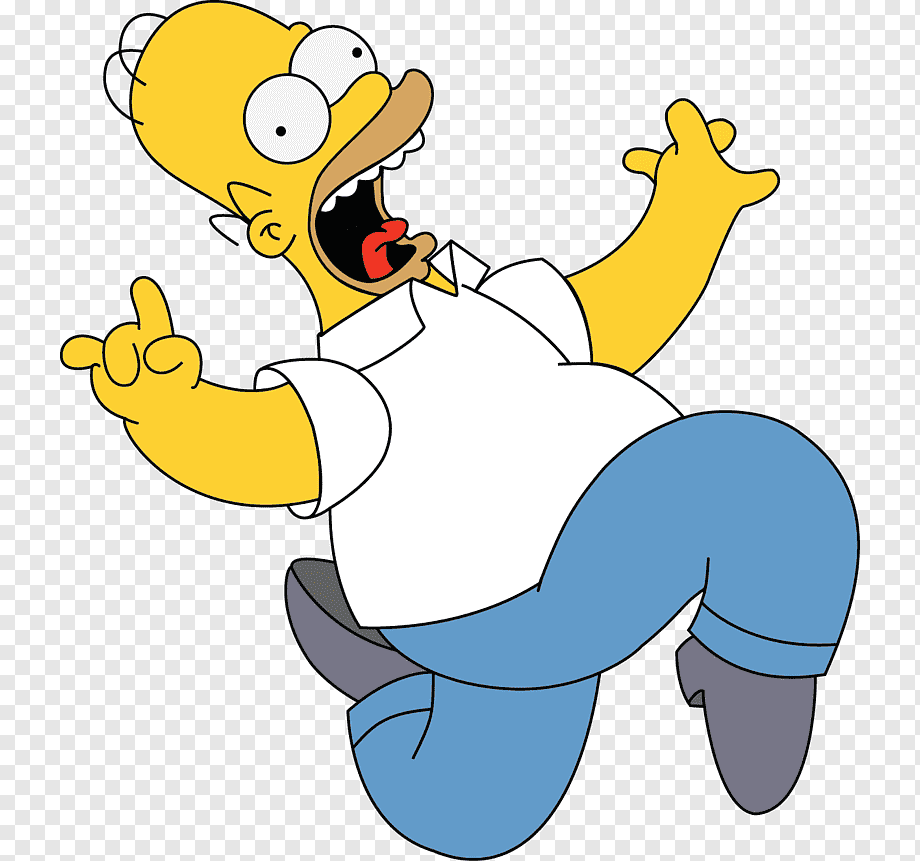

In [138]:
from IPython.display import Image
Image('./1.png', width=600, height=600)

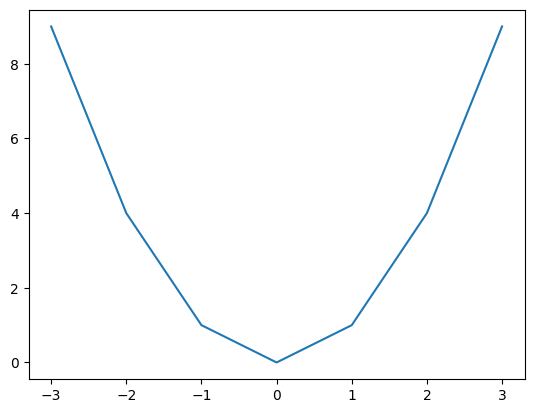

In [139]:
import matplotlib.pyplot as plt

A1 = [-3, -2, -1, 0, 1, 2, 3]
B1 = [i**2 for i in A1]
plt.plot(A1, B1)

$$ 
\int_0^5 f(x) dx = \int_0^1 f(x) dx + \int_1^5 f(x) dx
$$

$$
\int_a^b f(x) dx = \sum_{i=1}^n \int_{x_{2i-2}}^{x_{2i}} f(x) dx  \approx \sum_{i=1}^n \int_{x_{xi-2}}^{x_{2i}} \left( a_i x^2 + b_i x + c_i \right)
$$

### Графическая иллюстрация метода парабол (метода Симпсона)

Красной линией изображен график функции $y=f(x)$, синей линией показано приближение графика функции $y=f(x) $ квадратичными параболами на каждом элементарном отрезке разбиения.

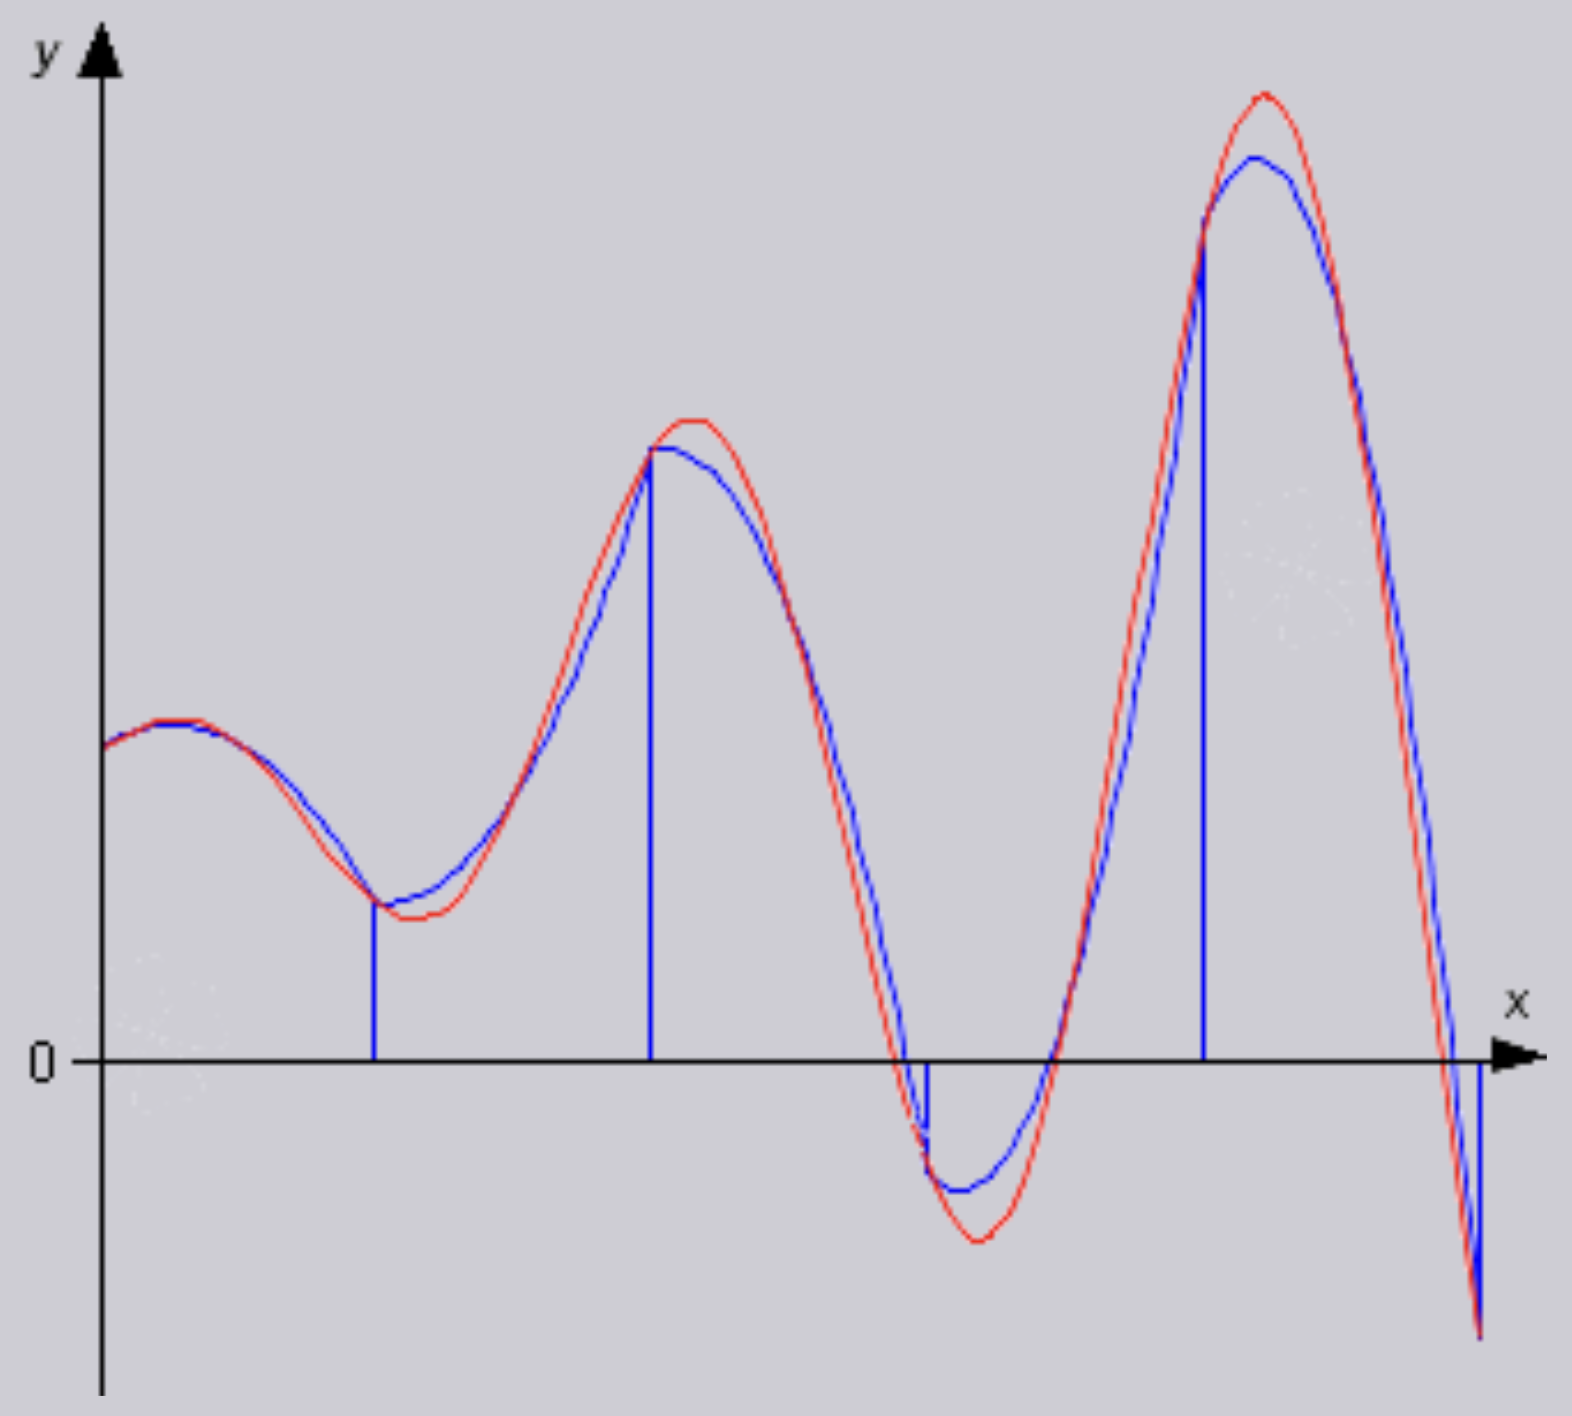

In [140]:
Image('./2.png', height=600, width=600)

Ещё одна исллюстрация

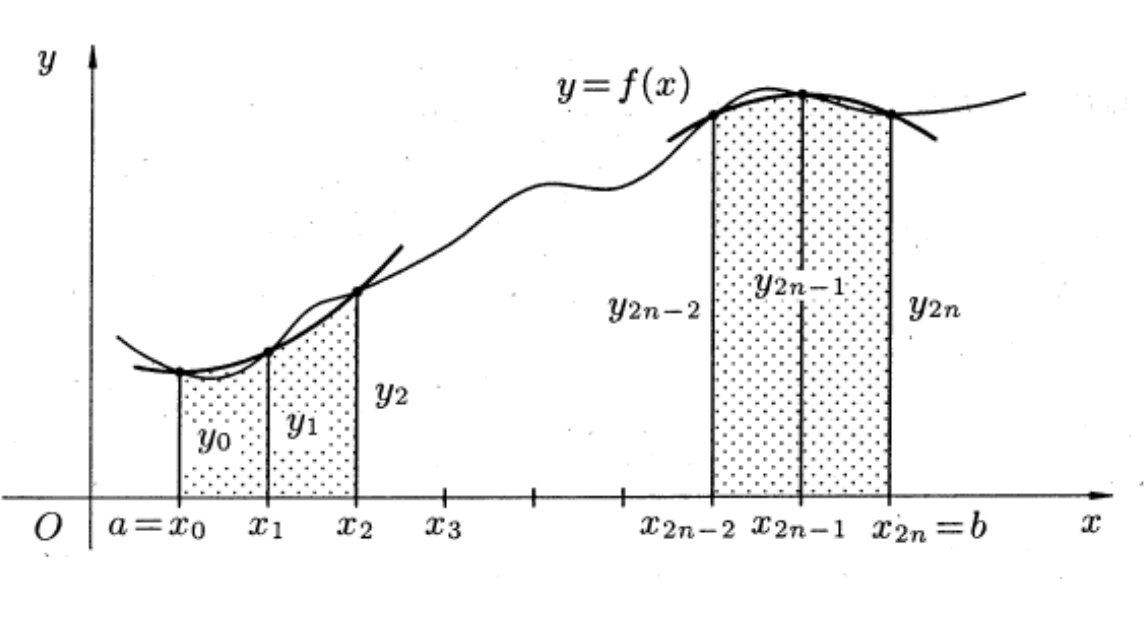

In [141]:
Image('./3.png', height=500, width=800)

Вывод формулы 

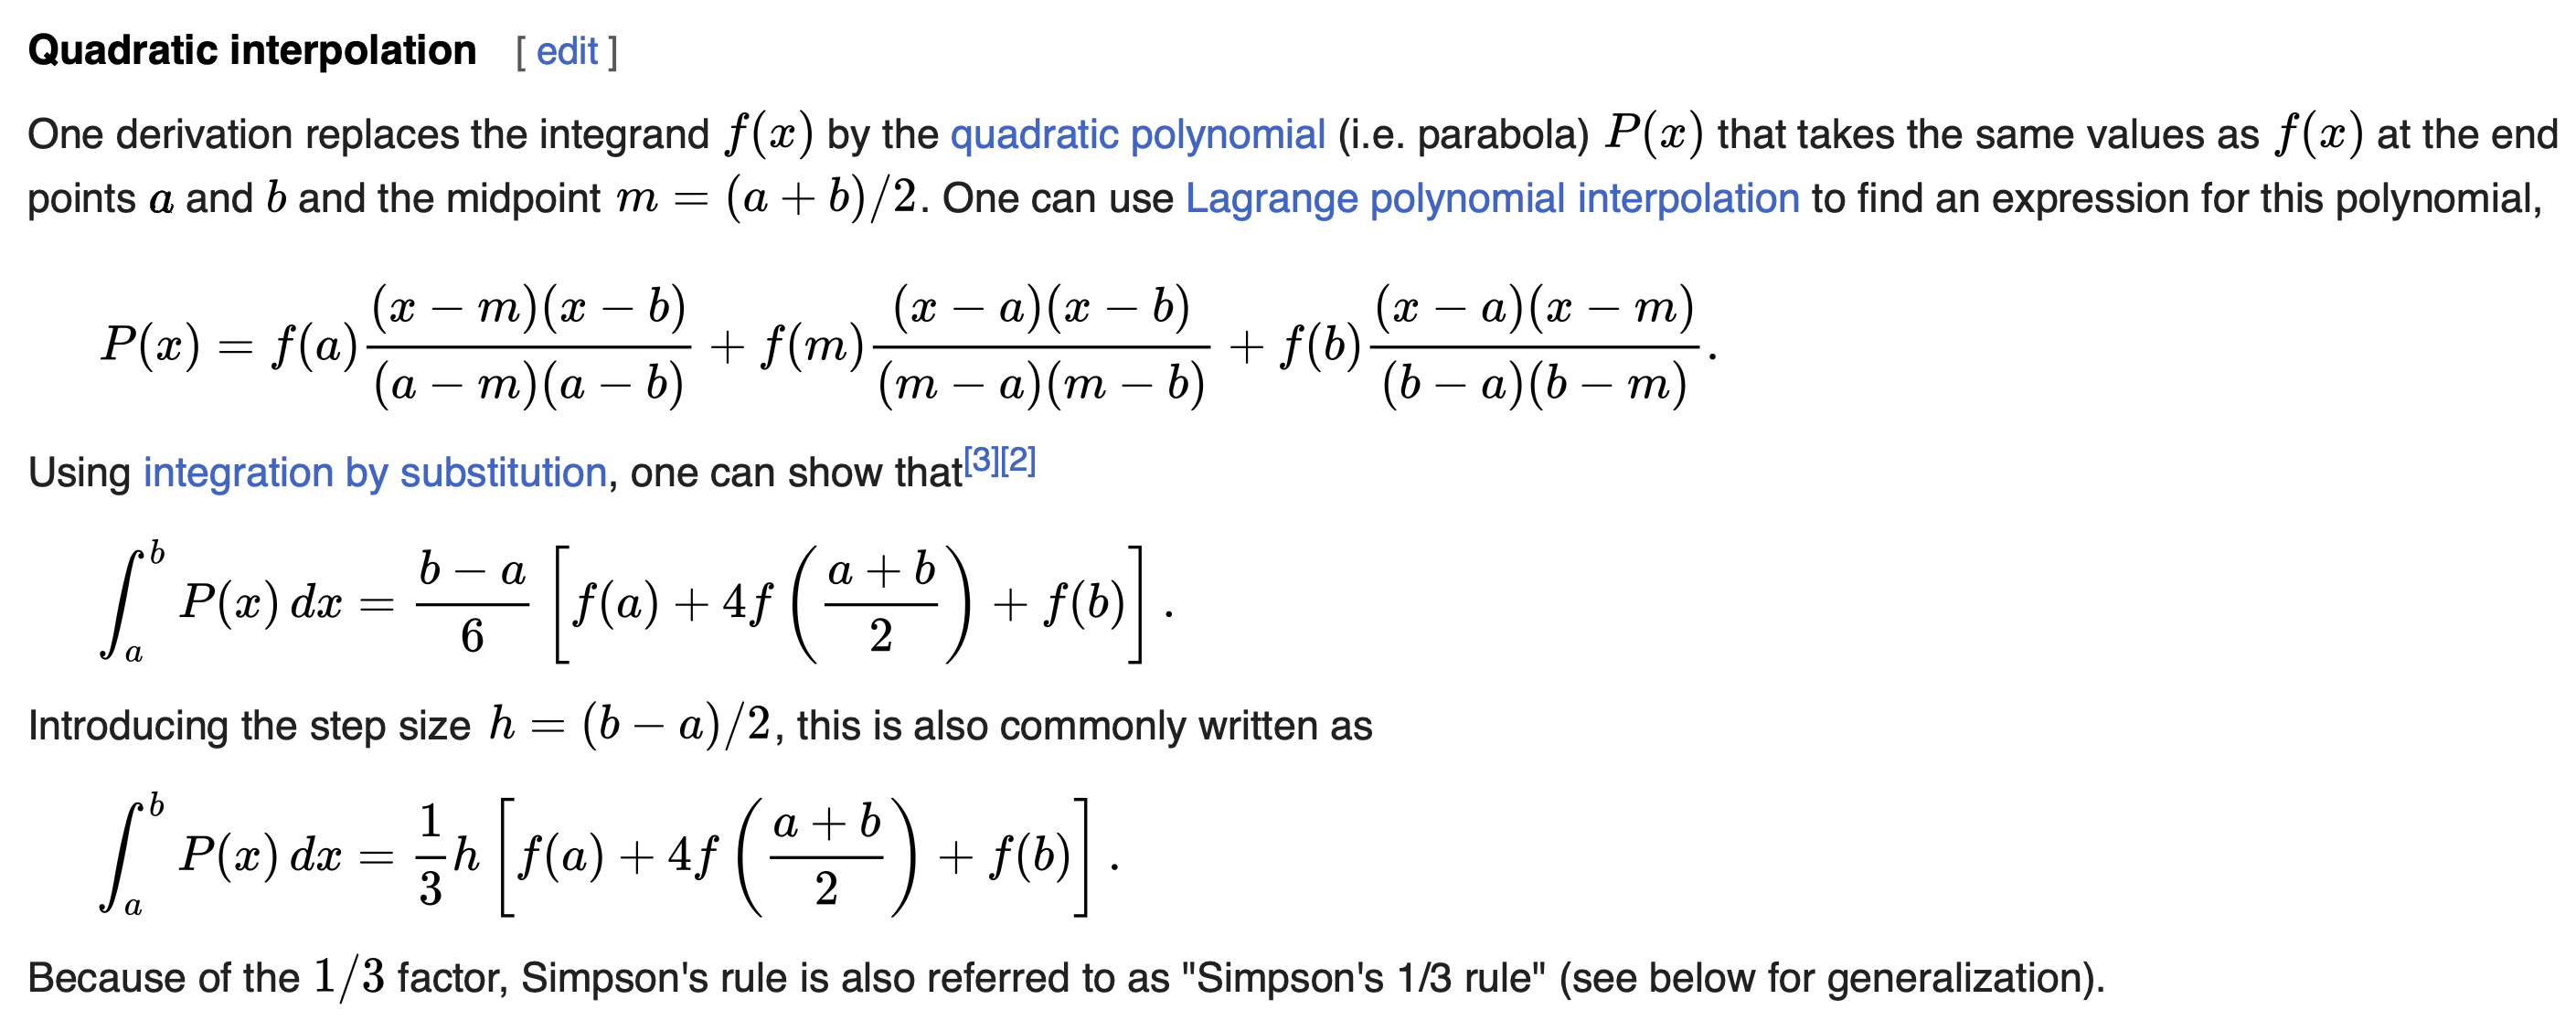

In [142]:
Image('./4.png')

Перепишем эту формулу в виде (доказательство в методичке, стр. 18)

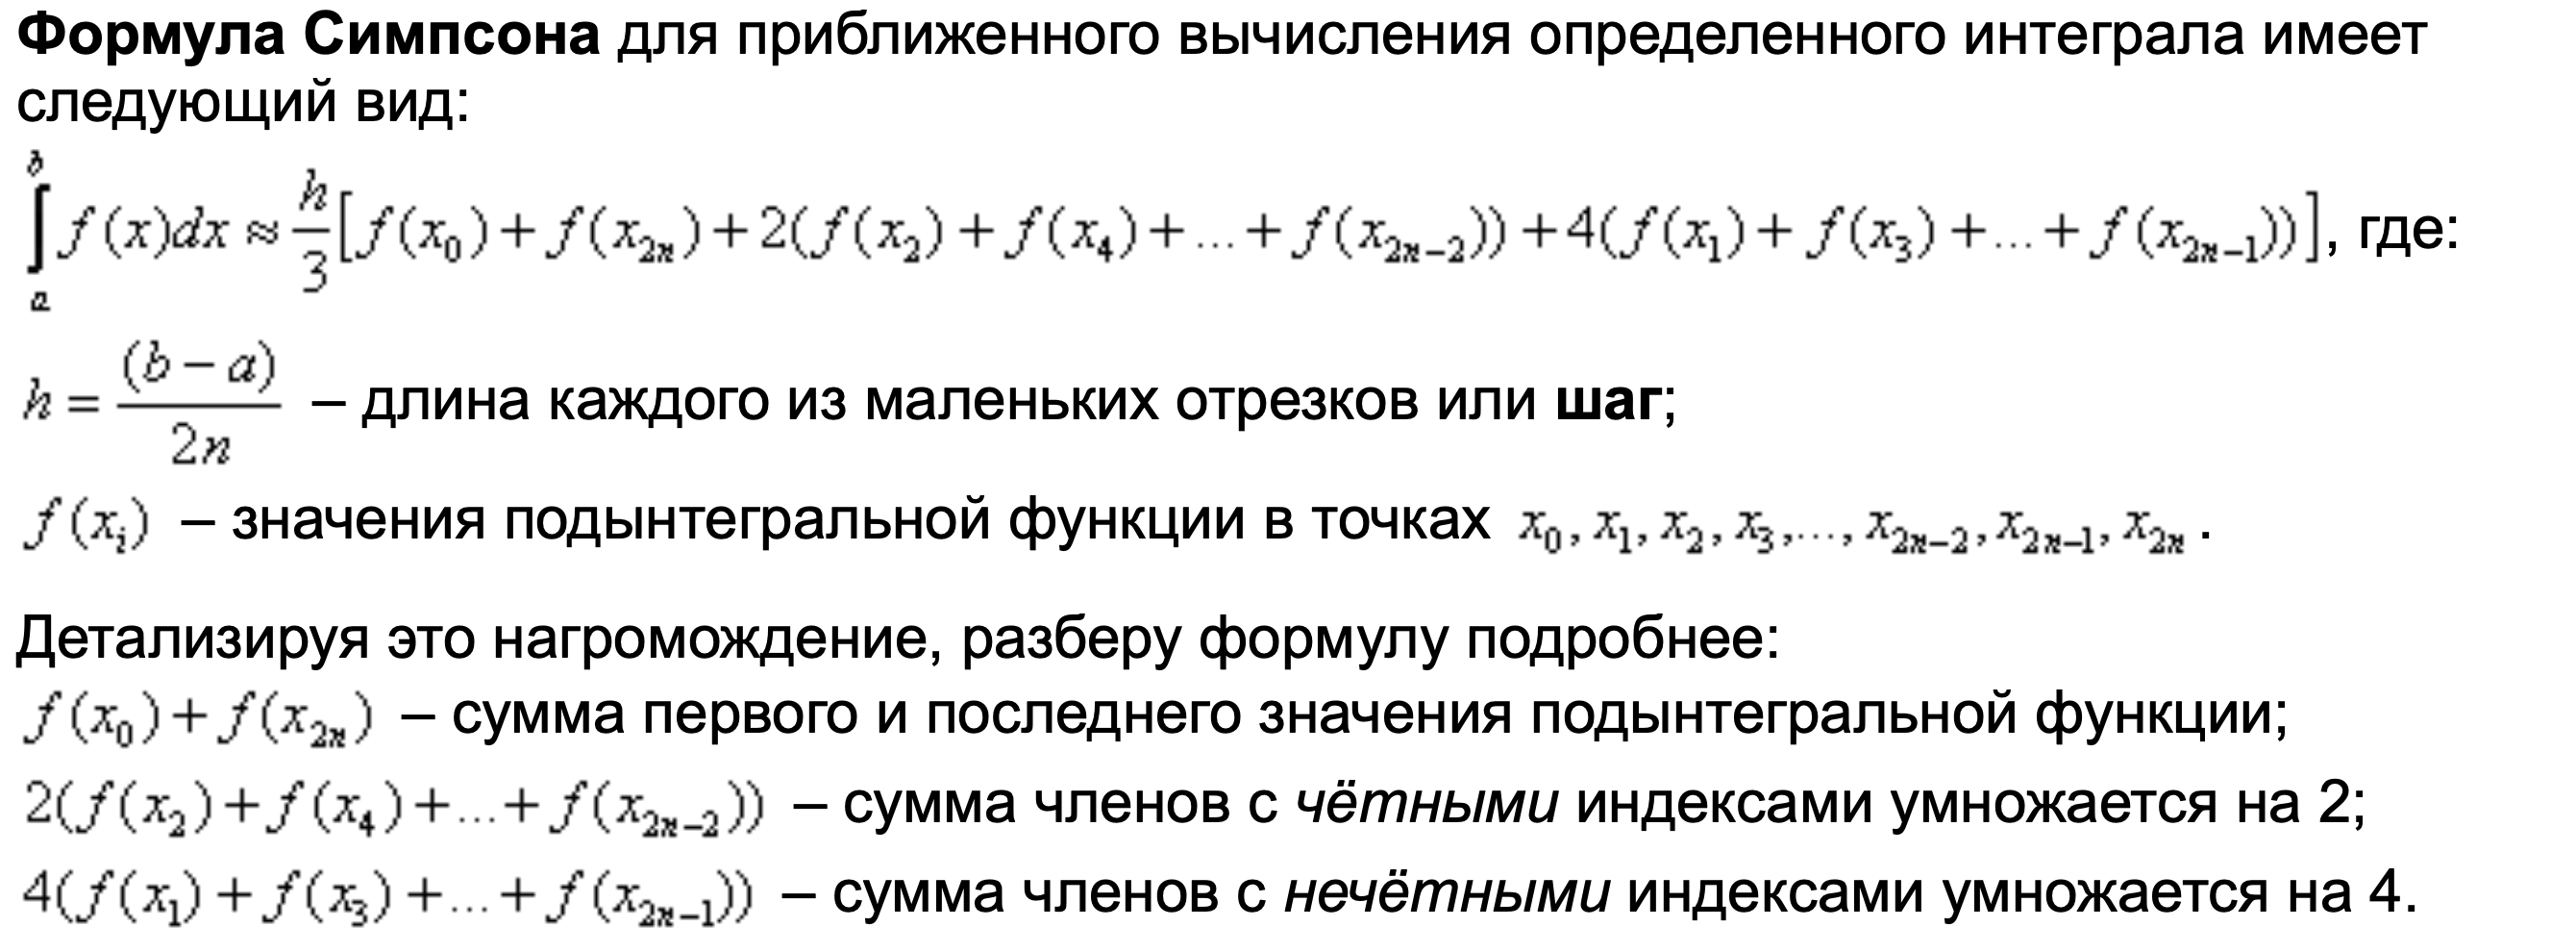

In [143]:
Image('./5.png')

## Задача 

Рассчитать таблицы функций Бесселя первого рода нулевого и первого порядков для $ x $ от 0 до 16 с шагом 0.1 при абсолютной погрешности не более $10^{−14} $.

Функция Бесселя первого рода целого порядка $ k $


$$
J_k(x) = \frac{1}{\pi} \int_0^{\pi} cos \left[ k*\varphi - x sin(\varphi) \right] d \varphi
$$

In [144]:
def funcion(phi, x, k):
    '''
    Подынтегральное выражение
    n – порядок функции (0 и 1 в нашем случае)
    '''
    return 1 / np.pi * np.cos(
                              k * phi - x * np.sin(phi)
                              )

In [145]:
def Simpson(x, k, N = 10, eps = 10**(-14)):
    '''
    Находим интеграл методом Симпсона

    N – число точек разбиения
    '''

    #Границы интервала
    a = 0
    b = np.pi

    #Шаг
    #h = (b - a) / N # убрать (?)


    #Считаем нулевое приближение интеграла
    def Count(num_of_points):
        '''
        Зададим функцию, которая будет считать значения интеграла 
        для заданного числа точек разбиения
        '''
        
        #Шаг
        h = (b-a) / num_of_points

        I = funcion(phi = a, k=k, x=x) #Значение интеграла при phi = a
        
        for i in range(1, num_of_points):
            func = funcion(phi=a + h * i,
                           k = k,
                           x = x)                           
            if i % 2 == 0:
                I = I + 2 * func #Для чётных точек
            else:
                I = I + 4 * func #Для нечётных точек
    
        I = I + funcion(phi=b, k=k, x=x) #Значение в последней точке интервала

        return I * (h / 3)


    #return Count(N)

    I0 = Count(N)
    N = 2 * N
    I1 = Count(N)

    while np.abs(I1 - I0) > eps:
        I0 = Count(N)
        N = 2 * N
        I1 = Count(N)
        #print(I1)

    return I0

Simpson(10, 0)

-0.24593576445134857

## Численное интегрирование с использованием SciPy

In [146]:
import numpy as np
from scipy.integrate import quad


result, error = quad(funcion, 0, np.pi, args=(10, 0))
print("Значение интеграла:", result)
print("Оценка погрешности:", error)


Значение интеграла: -0.24593576445134846
Оценка погрешности: 1.6887163351104388e-13


Рассчитаем значение функции Бестеля

In [147]:
import pandas as pd

df = pd.DataFrame()

In [148]:
#X = np.linspace(0, 16, 160, retstep=True)
#X

In [149]:
X = np.array([0.1 * i for i in range(161)])

#Можно было вспомнить про 
np.arange(0, 16.1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [150]:
#Создадим пустые списки

Y1 = []
Y2 = []

for i in X:
    Y1.append(Simpson(x=i, k=0))
    Y2.append(Simpson(x=i, k=1))

In [151]:
df['X'] = X
df['1-го рода'] = Y1
df['2-го рода'] = Y2

In [152]:
df

,X,1-го рода,2-го рода
0,0.0,1.000000,5.231803e-17
1,0.1,0.997502,4.993753e-02
2,0.2,0.990025,9.950083e-02
3,0.3,0.977626,1.483188e-01
4,0.4,0.960398,1.960266e-01
...,...,...,...
156,15.6,-0.125326,1.544396e-01
157,15.7,-0.140070,1.402157e-01
158,15.8,-0.153326,1.246913e-01
159,15.9,-0.164970,1.080279e-01


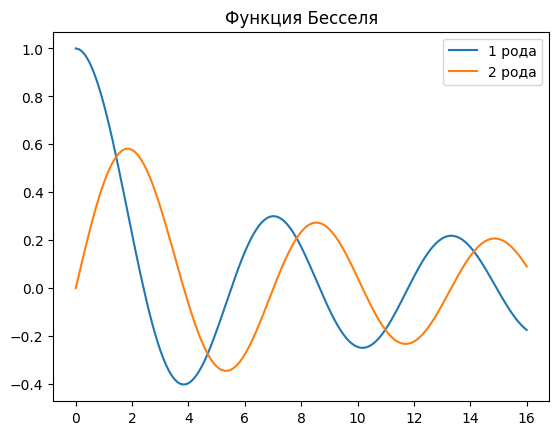

In [153]:
import matplotlib.pyplot as plt

plt.plot(df['X'], df['1-го рода'], label='1 рода')
plt.plot(df['X'], df['2-го рода'], label='2 рода')
plt.legend()
plt.title('Функция Бесселя')
plt.show()

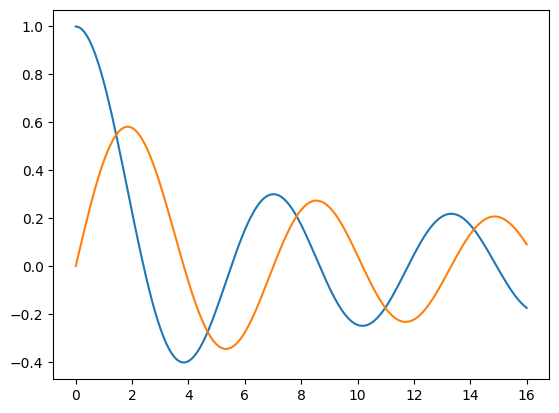

In [154]:
from scipy.special import j0, jv

Y1_0 = jv(0, X)
Y2_0 = jv(1, X)

plt.plot(X, Y1_0, label='1р, scipy')
plt.plot(X, Y2_0, label='2p, scipy')

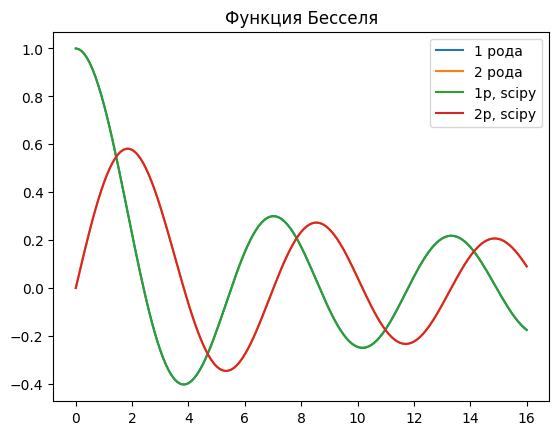

In [155]:
plt.plot(df['X'], df['1-го рода'], label='1 рода')
plt.plot(df['X'], df['2-го рода'], label='2 рода')
plt.plot(X, Y1_0, label='1р, scipy')
plt.plot(X, Y2_0, label='2p, scipy')
plt.legend()
plt.title('Функция Бесселя')
plt.show()

In [156]:
df

,X,1-го рода,2-го рода
0,0.0,1.000000,5.231803e-17
1,0.1,0.997502,4.993753e-02
2,0.2,0.990025,9.950083e-02
3,0.3,0.977626,1.483188e-01
4,0.4,0.960398,1.960266e-01
...,...,...,...
156,15.6,-0.125326,1.544396e-01
157,15.7,-0.140070,1.402157e-01
158,15.8,-0.153326,1.246913e-01
159,15.9,-0.164970,1.080279e-01


In [157]:
'''
df['Error 1'] = Y1_0 - df['1-го рода']
df['Error 2'] = Y2_0 - df['2-го рода']

plt.plot(df['X'], df['Error 1'] )
plt.plot(df['X'], df['Error 2'] )
'''
True

True

In [158]:
#df.to_excel('data.xlsx', index=False)